# Multivariate Linear Regression

In this program, the multivariate linear regression is implemented on a dataset called Blood Pressure, which consists of three features namely Age(in years), Weight(in pounds) and Systolic Blood Pressure. The features 'Age(in years)' and 'Weight(in pounds)' are considered as the explanatory variables whereas the feature 'Blood Pressure' is considered as the response variable.

STEP - 1: Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

STEP - 2: Loading the dataset

In [2]:
dataset = pd.read_csv('data\BloodPressure.csv')

STEP - 3: Initializing the required variables

In [3]:
Y = dataset[['Blood Pressure']]
X1 = dataset[['Age in years']]
X2 = dataset[['Weight in pounds']]
n = len(X1)
X1sq = np.multiply(X1,X1)
X2sq = np.multiply(X2,X2)
X1Y = np.multiply(X1,Y)
X2Y = np.multiply(X2,Y)
X1X2 = np.multiply(X1,X2)

STEP - 4: Finding the summations of the variables

In [4]:
Y_sum = 0
for i in range(0, n):
    Y_sum = Y_sum + Y.iloc[i,0];

X1_sum = 0
for i in range(0, n):
    X1_sum = X1_sum + X1.iloc[i,0];

X2_sum = 0
for i in range(0, n):
    X2_sum = X2_sum + X2.iloc[i,0];

X1sq_sum = 0
for i in range(0, n):
    X1sq_sum = X1sq_sum + X1sq.iloc[i,0];

X2sq_sum = 0
for i in range(0, n):
    X2sq_sum = X2sq_sum + X2sq.iloc[i,0];

X1Y_sum = 0
for i in range(0, n):
    X1Y_sum = X1Y_sum + X1Y.iloc[i,0];

X2Y_sum = 0
for i in range(0, n):
    X2Y_sum = X2Y_sum + X2Y.iloc[i,0];

X1X2_sum = 0
for i in range(0, n):
    X1X2_sum = X1X2_sum + X1X2.iloc[i,0];

STEP - 5: Declaring and computing the variables that are required to find B0, B1 & B2

In [5]:
y_mean = Y_sum / n
x1_mean = X1_sum / n
x2_mean = X2_sum / n
x1sq_sum = X1sq_sum - ( (X1_sum**2) / n )
x2sq_sum = X2sq_sum - ( (X2_sum**2) / n )
x1y_sum = X1Y_sum - ( (X1_sum*Y_sum) / n )
x2y_sum = X2Y_sum - ( (X2_sum*Y_sum) / n )
x1x2_sum = X1X2_sum - ( (X1_sum*X2_sum) / n )

STEP - 6: Computing the values of B0, B1 & B2

In [6]:
B1 = ((x2sq_sum * x2y_sum) - (x1x2_sum * x2y_sum)) / ((x1sq_sum * x2sq_sum) - x1x2_sum**2)
B2 = ((x1sq_sum * x2y_sum) - (x1x2_sum * x1y_sum)) / ((x1sq_sum * x2sq_sum) - x1x2_sum**2)
B0 = y_mean - B1 * x1_mean - B2 * x2_mean

STEP - 7: Printing the results

In [7]:
print('The value of B0 is', round(B0, 4))
print('The value of B1 is', round(B1, 4))
print('The value of B2 is', round(B2, 4))
print("\nRegression Line: Y = (",round(B0, 4),") + (",round(B1, 4),") x1 + (",round(B2, 4),") x2")

The value of B0 is -738.419
The value of B1 is 13.181
The value of B2 is 0.3349

Regression Line: Y = ( -738.419 ) + ( 13.181 ) x1 + ( 0.3349 ) x2


STEP - 8: Predicting the Y values

In [8]:
Y_new = pd.DataFrame()
Y_new['Blood Pressure'] = B0 + B1*X1['Age in years'] + B2*X2['Weight in pounds']

STEP - 9: Visualisation

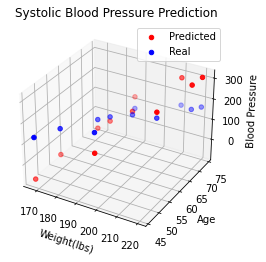

In [9]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = Y_new
y_line = X1['Age in years']
x_line = X2['Weight in pounds']
ax.set_title('Systolic Blood Pressure Prediction')
ax.set(xlabel='Weight(lbs)', ylabel='Age', zlabel='Blood Pressure')
ax.scatter3D(x_line, y_line, z_line, c='r', label='Predicted')

z_line = Y
y_line = X1['Age in years']
x_line = X2['Weight in pounds']
ax.set_title('Systolic Blood Pressure Prediction')
ax.set(xlabel='Weight(lbs)', ylabel='Age', zlabel='Blood Pressure')
ax.scatter3D(x_line, y_line, z_line, c='b', label = 'Real')
ax.legend()

Step - 10: Computing Mean Square Error

In [10]:
Error = pd.DataFrame()
Error['Err'] = Y['Blood Pressure'].sub(Y_new['Blood Pressure'], axis = 0)
Error['Error_Sq'] = np.power((Error['Err']),2)
SSE = 0
for i in range(0, n):
    SSE = SSE + Error.iloc[i,1];
Mean_SE = SSE / n
print('Mean Squared Error =', round(Mean_SE, 4))

Mean Squared Error = 11465.8152
